<a href="https://colab.research.google.com/github/vainamonen/KoronaScience/blob/master/KoronaScienceDay1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [15, 5]
from IPython import display
from ipywidgets import interact, widgets

## Read Data for Cases, Deaths and Recoveries
ConfirmedCases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
Deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
Recoveries_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')



```
# This is formatted as code
```

Pobieranie danychi import bibliotek

In [0]:
def cleandata(df_raw):
    df_cleaned=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Cases',var_name='Date')
    df_cleaned=df_cleaned.set_index(['Country/Region','Province/State','Date'])
    return df_cleaned 

# Clean all datasets
ConfirmedCases=cleandata(ConfirmedCases_raw)
Deaths=cleandata(Deaths_raw)
Recoveries=cleandata(Recoveries_raw)

In [0]:
ConfirmedCases

Lat      Long  Cases
Country/Region Province/State Date                             
Thailand       NaN            1/22/20  15.0000  101.0000      2
Japan          NaN            1/22/20  36.0000  138.0000      2
Singapore      NaN            1/22/20   1.2833  103.8333      0
Nepal          NaN            1/22/20  28.1667   84.2500      0
Malaysia       NaN            1/22/20   2.5000  112.5000      0
...                                        ...       ...    ...
US             Socorro, NM    3/11/20  33.8837 -106.7235      0
               Bernalillo, NM 3/11/20  35.0178 -106.6291      0
               Oakland, MI    3/11/20  42.5922  -83.3362      0
               Wayne, MI      3/11/20  42.2791  -83.3362      0
               New Castle, DE 3/11/20  39.5393  -75.6674      0

[20200 rows x 3 columns]

In [0]:
polska=ConfirmedCases.loc["Poland"]

In [0]:
polska.tail(10)

Lat     Long  Cases
Province/State Date                            
NaN            3/2/20   51.9194  19.1451      0
               3/3/20   51.9194  19.1451      0
               3/4/20   51.9194  19.1451      1
               3/5/20   51.9194  19.1451      1
               3/6/20   51.9194  19.1451      5
               3/7/20   51.9194  19.1451      5
               3/8/20   51.9194  19.1451     11
               3/9/20   51.9194  19.1451     16
               3/10/20  51.9194  19.1451     22
               3/11/20  51.9194  19.1451     31

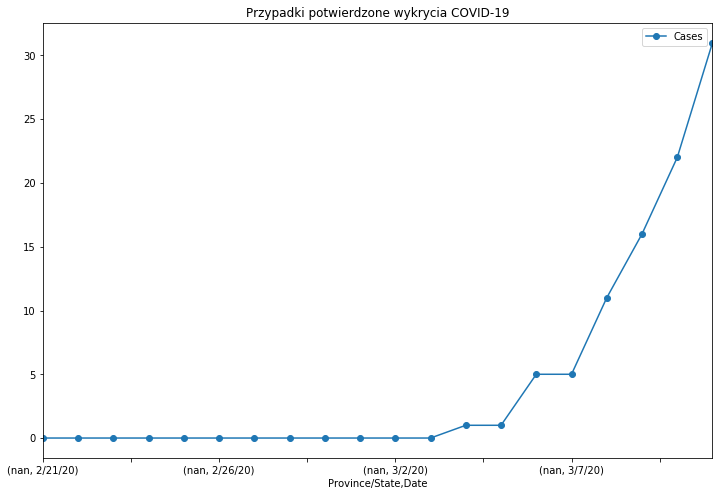

In [0]:
polska.tail(20).plot(y='Cases', figsize=(12,8), marker='o', title='Przypadki potwierdzone wykrycia COVID-19')


In [0]:
Hubei=ConfirmedCases.loc["China", "Hubei"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: PerformanceWarning:

indexing past lexsort depth may impact performance.



In [0]:
razem=polska.merge(Hubei, left_on="Date", right_on="Date")

In [0]:
razem

,Lat_x,Long_x,Cases_x,Lat_y,Long_y,Cases_y
Date,,,,,,
1/22/20,51.9194,19.1451,0,30.9756,112.2707,444
1/23/20,51.9194,19.1451,0,30.9756,112.2707,444
1/24/20,51.9194,19.1451,0,30.9756,112.2707,549
1/25/20,51.9194,19.1451,0,30.9756,112.2707,761
1/26/20,51.9194,19.1451,0,30.9756,112.2707,1058
1/27/20,51.9194,19.1451,0,30.9756,112.2707,1423
1/28/20,51.9194,19.1451,0,30.9756,112.2707,3554
1/29/20,51.9194,19.1451,0,30.9756,112.2707,3554
1/30/20,51.9194,19.1451,0,30.9756,112.2707,4903


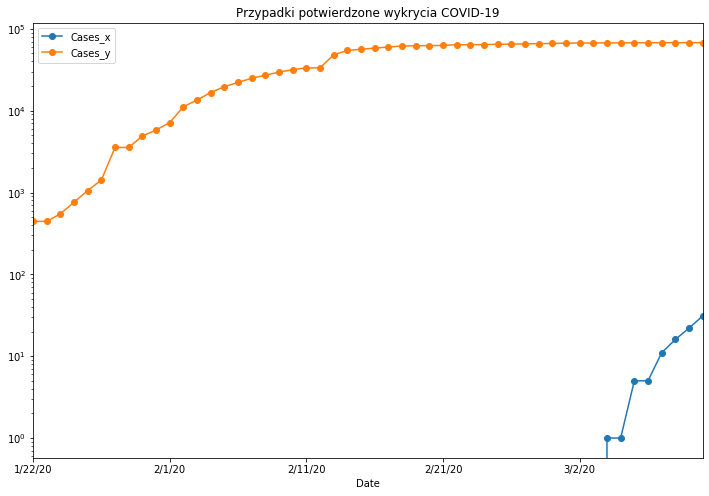

In [0]:
razem.plot(y=['Cases_x', 'Cases_y'], figsize=(12,8), marker='o', title='Przypadki potwierdzone wykrycia COVID-19', logy=True)
plt.show()

In [0]:
lista = [1,2,3,4,5,6]

In [0]:
lista[::2]

[1, 3, 5]

In [0]:
lista2= [3,3,3,3,3,3]

In [0]:
lista+lista2

[1, 2, 3, 4, 5, 6, 3, 3, 3, 3, 3, 3]

In [0]:
lista3=[0,0,0,0,0]

In [0]:
for i in range(5):
  lista3[i]=lista[i]+lista2[i]



In [0]:
lista3

[4, 5, 6, 7, 8]

In [0]:
np.array(lista)+np.array(lista2)

array([4, 5, 6, 7, 8, 9])

In [0]:
razemsuma=np.array(razem['Cases_x'])+np.array(razem['Cases_y'])

In [0]:
razemsuma=razem['Cases_x']+razem['Cases_y']

In [0]:
razemsuma

Date
1/22/20      444
1/23/20      444
1/24/20      549
1/25/20      761
1/26/20     1058
1/27/20     1423
1/28/20     3554
1/29/20     3554
1/30/20     4903
1/31/20     5806
2/1/20      7153
2/2/20     11177
2/3/20     13522
2/4/20     16678
2/5/20     19665
2/6/20     22112
2/7/20     24953
2/8/20     27100
2/9/20     29631
2/10/20    31728
2/11/20    33366
2/12/20    33366
2/13/20    48206
2/14/20    54406
2/15/20    56249
2/16/20    58182
2/17/20    59989
2/18/20    61682
2/19/20    62031
2/20/20    62442
2/21/20    62662
2/22/20    64084
2/23/20    64084
2/24/20    64287
2/25/20    64786
2/26/20    65187
2/27/20    65596
2/28/20    65914
2/29/20    66337
3/1/20     66907
3/2/20     67103
3/3/20     67217
3/4/20     67333
3/5/20     67467
3/6/20     67597
3/7/20     67671
3/8/20     67718
3/9/20     67759
3/10/20    67782
3/11/20    67804
dtype: int64

In [0]:
razem['Cases_y']

Date
1/22/20      444
1/23/20      444
1/24/20      549
1/25/20      761
1/26/20     1058
1/27/20     1423
1/28/20     3554
1/29/20     3554
1/30/20     4903
1/31/20     5806
2/1/20      7153
2/2/20     11177
2/3/20     13522
2/4/20     16678
2/5/20     19665
2/6/20     22112
2/7/20     24953
2/8/20     27100
2/9/20     29631
2/10/20    31728
2/11/20    33366
2/12/20    33366
2/13/20    48206
2/14/20    54406
2/15/20    56249
2/16/20    58182
2/17/20    59989
2/18/20    61682
2/19/20    62031
2/20/20    62442
2/21/20    62662
2/22/20    64084
2/23/20    64084
2/24/20    64287
2/25/20    64786
2/26/20    65187
2/27/20    65596
2/28/20    65914
2/29/20    66337
3/1/20     66907
3/2/20     67103
3/3/20     67217
3/4/20     67332
3/5/20     67466
3/6/20     67592
3/7/20     67666
3/8/20     67707
3/9/20     67743
3/10/20    67760
3/11/20    67773
Name: Cases_y, dtype: int64

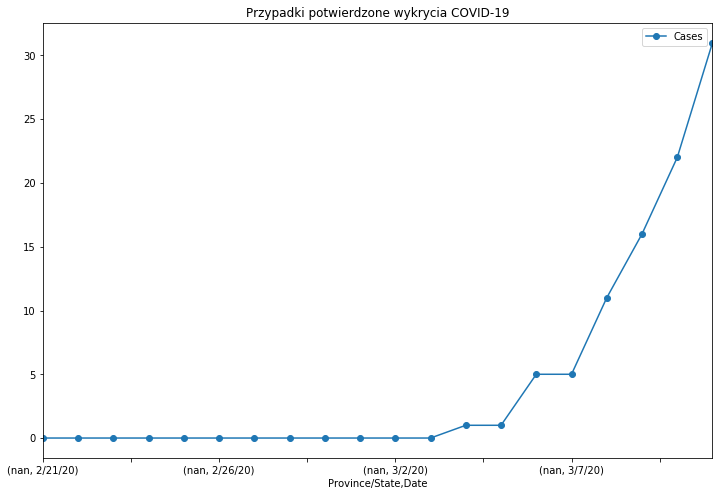

In [0]:
polska.tail(20).plot(y='Cases', figsize=(12,8), marker='o', title='Przypadki potwierdzone wykrycia COVID-19')


In [0]:
polska.tail(10)

Lat     Long  Cases
Province/State Date                            
NaN            3/2/20   51.9194  19.1451      0
               3/3/20   51.9194  19.1451      0
               3/4/20   51.9194  19.1451      1
               3/5/20   51.9194  19.1451      1
               3/6/20   51.9194  19.1451      5
               3/7/20   51.9194  19.1451      5
               3/8/20   51.9194  19.1451     11
               3/9/20   51.9194  19.1451     16
               3/10/20  51.9194  19.1451     22
               3/11/20  51.9194  19.1451     31

In [0]:
przypadki=polska.Cases

In [0]:
for i in polska.Cases:
  if (i>0): print('wykryto')

wykryto
wykryto
wykryto
wykryto
wykryto
wykryto
wykryto
wykryto


In [0]:
for i in przypadki:
  if i: 
    print('wykryto: ')
    print(i)

wykryto: 
1
wykryto: 
1
wykryto: 
5
wykryto: 
5
wykryto: 
11
wykryto: 
16
wykryto: 
22
wykryto: 
31


In [0]:
type(np.array(lista))


numpy.ndarray